In [ ]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import *
from pgmpy.inference import VariableElimination
from pgmpy.metrics import *
from pgmpy.metrics.bn_inference import *
from pgmpy.readwrite import XMLBIFWriter

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import warnings

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(f'data{os.sep}heart.csv')
df = df[~(df['Cholesterol'] == 0) & ~(df['RestingBP'] == 0)]

In [ ]:
df = df[~(df['Cholesterol'] == 0) & ~(df['RestingBP'] == 0)]

df['ExerciseAngina'] = df['ExerciseAngina'].apply(
    lambda x: False if x == 'N' else True)
df['HeartDisease'] = df['HeartDisease'].apply(
    lambda x: False if x == 0 else True)

df['FastingBS'] = df['FastingBS'].apply(lambda x: False if x == 0 else True)
df["Age"] = pd.cut(x=df["Age"], bins=[20, 30, 40, 50, 60, 70, 80], labels=[
                   "20-30", "30-40", "40-50", "50-60", "60-70", "70-80"])
df["RestingBP"] = pd.cut(x=df["RestingBP"], bins=[90, 120, 140, np.Inf], labels=[
                         "normal", "high", "very-high"])
df["Cholesterol"] = pd.cut(x=df["Cholesterol"], bins=[
                           0, 200, 240, np.Inf], labels=["optimal", "borderline", "high"])
df["MaxHR"] = pd.qcut(x=df["MaxHR"], q=4, labels=["low", "medium", "high", "very-high"])
df["Oldpeak"] = pd.cut(x=df["Oldpeak"], bins=[-np.Inf, 0.5, 1, 2, np.Inf], labels=[
                       "<=0.5", "0-5-1", "1-2", "2+"])

In [ ]:
target_variable = "HeartDisease"
X, y = df.drop(columns=target_variable), df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [ ]:
network = BayesianNetwork()

In [ ]:
nodes = list(df.columns)

In [ ]:
for _ in nodes:
    network.add_node(_)

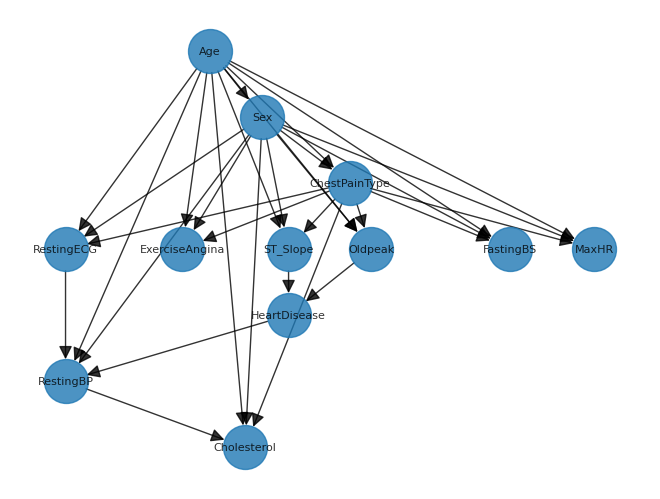

In [106]:
pos = nx.nx_agraph.graphviz_layout(network, prog="dot")

nx.draw(network, pos, with_labels=True, node_size=1000,
        font_size=8, arrowsize=20, alpha=0.8)

In [105]:
top

('RestingBP', 'Cholesterol', 0.9047619047619048)

In [ ]:
for i in range(5):
    scores = []
    for source in nodes:
        for destination in nodes:
            if source == destination:
                continue
            had_edge = network.has_edge(source, destination)
            if not network.has_edge(source, destination):
                try:
                    network.add_edge(source ,destination)
                    network.cpds = []
                    print(source, "->", destination)
                    network.fit(X_train.join(y_train), estimator=BayesianEstimator, prior_type="BDeu")
                    ypred = network.predict(X_test)
                    print(source, "->", destination)
                    score = fbeta_score(y_test, ypred, beta=2)
                    print(score)
                    network.remove_edge(source, destination)
                    scores.append((source, destination, score))
                except Exception as e:
                    print(e)
                    if not had_edge and network.has_edge(source, destination):
                        network.remove_edge(source, destination)
    
    top = max(scores, key=lambda x: x[2])
    network.add_edge(top[0], top[1])


In [ ]:
top = max(scores, key=lambda x: x[2])


In [ ]:
sorted(scores, key=lambda x: x[2], reverse=True)

In [ ]:
top

In [ ]:
top

In [ ]:
network.add_edge(top[0], top[1])